In [1]:
pip install pandas

In [ ]:
pip install fbprophet

In [ ]:
import pandas as pd
from fbprophet import Prophet

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving BTC-USD.csv to BTC-USD (2).csv


In [ ]:
df=pd.read_csv('BTC-USD.csv')
df=df[["Date","Close"]]
df.columns=["ds","y"]
print(df)

             ds             y
0    2021-05-09  58232.316406
1    2021-05-10  55859.796875
2    2021-05-11  56704.574219
3    2021-05-12  49150.535156
4    2021-05-13  49716.191406
..          ...           ...
361  2022-05-05  36575.140625
362  2022-05-06  36040.921875
363  2022-05-07  35501.953125
364  2022-05-08  34059.265625
365  2022-05-09  33432.050781

[366 rows x 2 columns]


In [ ]:
prophet=Prophet()
prophet.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future=prophet.make_future_dataframe(periods=365)
print(future)

            ds
0   2021-05-09
1   2021-05-10
2   2021-05-11
3   2021-05-12
4   2021-05-13
..         ...
726 2023-05-05
727 2023-05-06
728 2023-05-07
729 2023-05-08
730 2023-05-09

[731 rows x 1 columns]


In [ ]:
forecast = prophet.predict(future)
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail(200)

,ds,yhat,yhat_lower,yhat_upper
531,2022-10-22,37147.770493,14874.701702,61615.799936
532,2022-10-23,37600.956166,14399.357975,62521.896886
533,2022-10-24,37535.504611,13904.329254,62381.637986
534,2022-10-25,37538.312344,14836.782976,62961.651273
535,2022-10-26,37638.102099,12947.391461,62992.215417
...,...,...,...,...
726,2023-05-05,34339.085762,-40446.198991,114300.073770
727,2023-05-06,34270.684312,-42134.705118,115609.246780
728,2023-05-07,34723.869985,-43291.401014,113957.343599
729,2023-05-08,34658.418430,-43759.683722,116802.957718


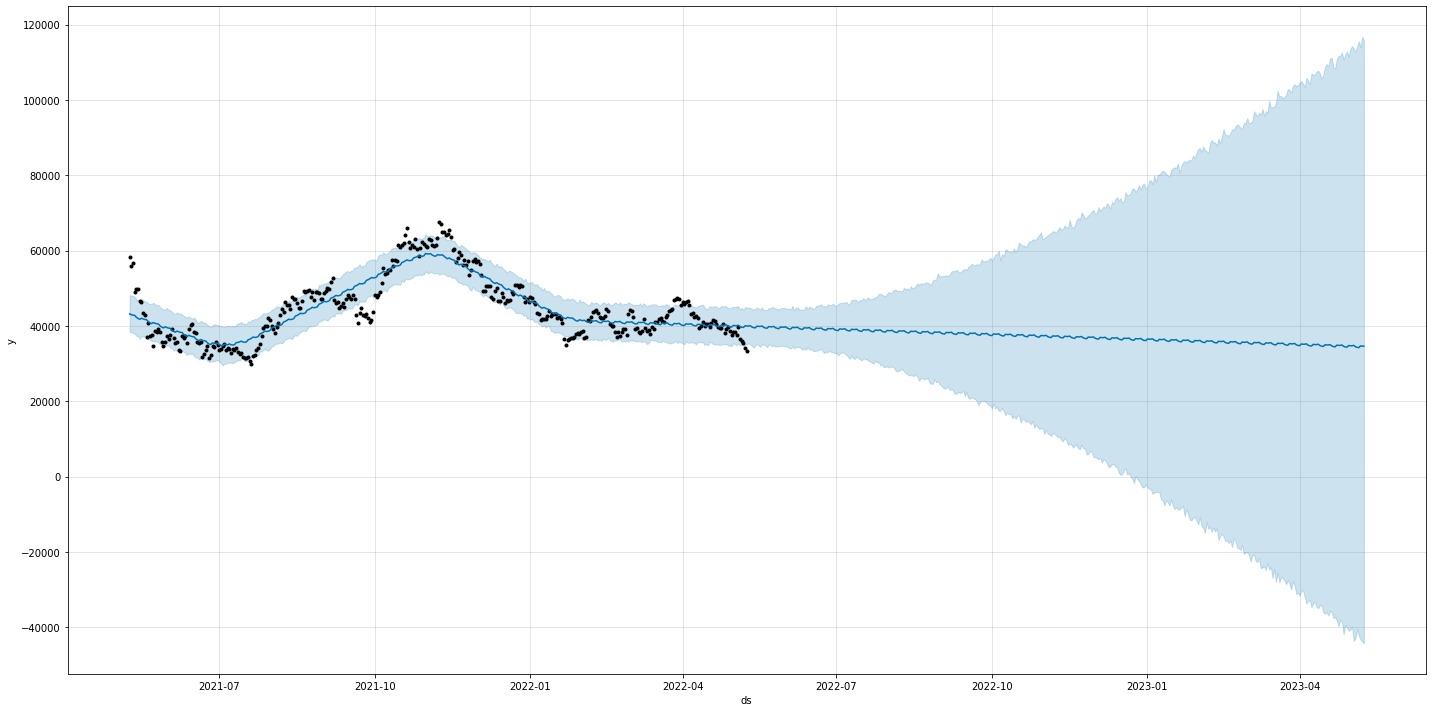

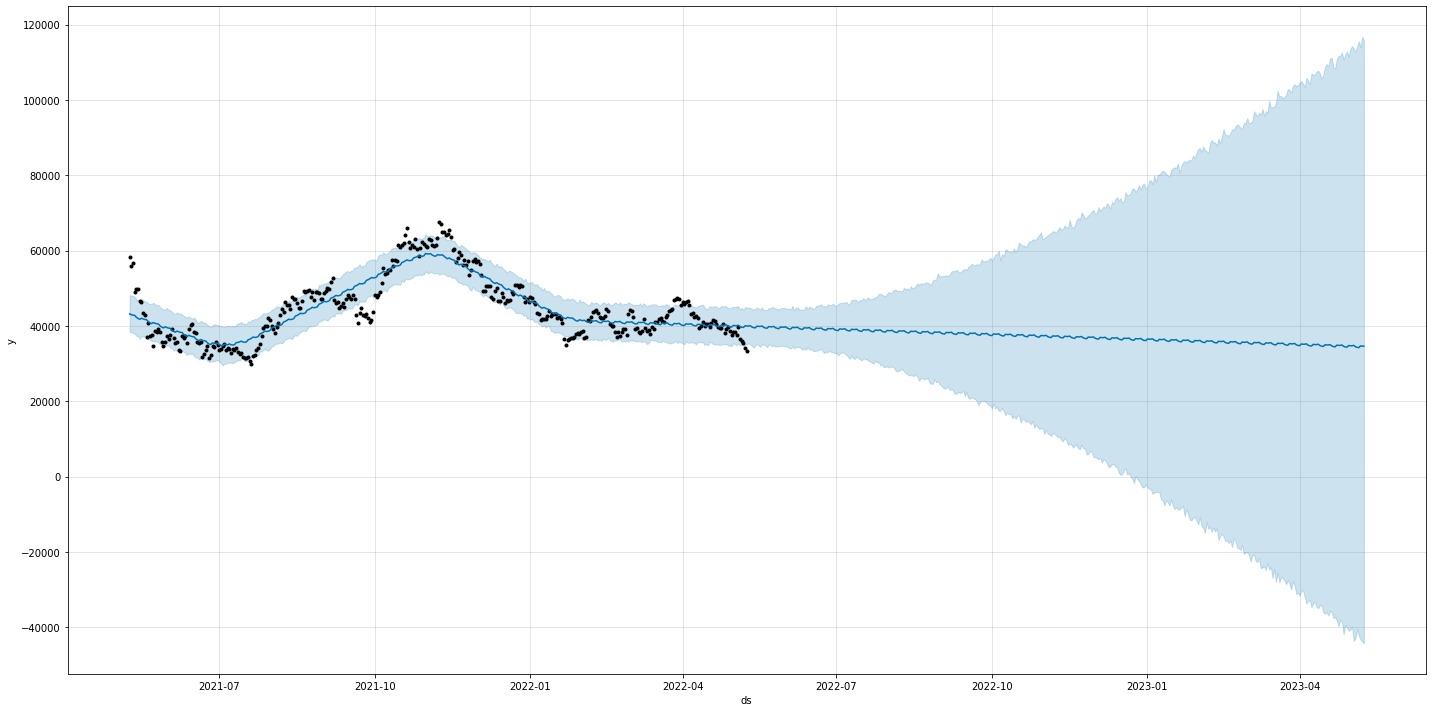

In [ ]:
from fbprophet.plot import plot
prophet.plot(forecast,figsize=(20,10))